In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt
from IPython.display import Image
from sklearn.utils import class_weight
seed = 7
np.random.seed(seed)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Print the version of tensorflow
print(tf.__version__)

2.4.0


# Problem Statement 

#### Given a bank customer, build a Artificial Neural Network based Classifier that will determine whether they will leave or not in the next 6 months

# Reading the Dataset for Bank Customers

In [3]:
# Read the csv data sample into pandas dataframe
df=pd.read_csv("bank.csv")

In [4]:
# Verify if the dataframe has been created successfully by reviewing the first 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Get the dimesnions of the sample data (number of rows and columns-features)
df.shape

(10000, 14)

In [6]:
# Get the concise summary of the dataframe like column dtype, null/non-null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Identify any Null/NaN values in any columns of the dataframe
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Generate descriptive statistics to summarize the central tendency, dispersion and shape of a dataset’s distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
# Evaluate the Balance column since it has too many zero values.
print("Customers with zero Balance that did not leave the Bank: {0:4d}".format(df['Balance'][(df['Balance'] < 1) & (df['Exited'] == 0)].count()))
print("Customers with zero Balance that left the Bank: {0:4d}".format(df['Balance'][(df['Balance'] < 1) & (df['Exited'] == 1)].count()))

Customers with zero Balance that did not leave the Bank: 3117
Customers with zero Balance that left the Bank:  500


### Evaluation of Balance variable in the Dataset

#### Considering we have significant counts of both (exited and not exited) customers with zero Balance, we will not treat this variable for outliers. We will process this independent variable as is provided in the data set.

In [10]:
# Count number of distinct values in sample dataset
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Treatment of Unique Values in Dataset

#### Based on the above information for unique values, we can conclude RowNumber and CustomerId are unique integer values and will not be useful in our algorithm. We will drop them

#### Similarly, Surname is just a LastName of the customer that will be inconsequential to our analysis and problem at hand. We will drop the Surname column as well

In [11]:
#Based on the above unique value analysis, we have identified CustomerId and RowNumber have all rows unique in sample data set.
#Also Surname column just contains names Lastnames of Customer. All these 3 features will not have any impact on our analysis
#We will drop them before proceeding. We have retained EstimatedSalary since these values can influence to determine Customer Churn
df = df.drop(labels=['CustomerId', 'Surname', 'RowNumber'], axis = 1)

In [12]:
# Determine skewness of all the variables. If skewness > 1, it is highly positively skewed. If skewness < -1, data is highly
# negatively skewed. Based on these values, we will determine if the skewness and outliers need to be addressed with 
# Transformation
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### Skewness 

#### There is no indication of significant skewness in the data based on the skewness values. No additional treatment is required.

## Sample Dataset Observations
#### There are 14 variables (features), 10000 data rows (samples)
#### 11 variables(features) are continuous, 3 variables(features) are categorical
#### There are non NULL/NaN values in the dataset

## Understanding the variables

### RowNumber and CustomerId
#### These are unique numbers for each row in the sample dataset. These will not have any influence on our algorithm so we have already dropped them as explained above


### Surname
#### This is the lastname of the Customer and will not have any influence on our algorithm. We have dropped this column from our dataset that we plan to provide for training to our algorithm.

### CreditScore
#### Represents Credit Worthiness of the customer. Mean value is 650, Median value is 652, Minimum value is 350, Maximum value is 850. Since Mean is close to Median, we can say the data is Normally distributed.

### Geography
#### Customers are from 3 countries (France, Germany and Spain). We will do additional analysis on this categorical variable in relation to our target variable Exited later. We will have to do OneHotEncoding and convert this categorical variable to continous prior to providing it to our model

### Gender
#### Represents Gender of the customer. Gender is ofcourse Male and Female. We will do additional analysis on this categorical variable in relation to our target variable Exited later. We will have to do OneHotEncoding and convert this categorical variable to continous prior to providing it to our model

### Age
#### Represents Age of the customer. Mean value is 38.92, Median value is 37, Minimum value is 18, Maximum value is 92. Since Mean > Median, data is slightly Right Skewed or Positively skewed but we can say it is close to Normally distributed. We can also see the Skew is 1.01 which indicates some skew and potential outliers.


### Tenure
#### Represents for how long the customer has been with the bank. Mean value is 5.01, Median value is 5,  Minimum value is 0, Maximum value is 10. Since Mean = Median, so the data is normally distributed for this variable. Skew value also confirms this.

### Balance
#### Represents the Balance in the customer account. Mean value is 76485, Median value is 97198, Minimum value is 0, Maximum value is 250898. Since Mean < Median, data is slightly Left Skewed or Negatively skewed. We can also see the Skew is -0.14 which indicates some skew but not significant enough. We see the could be several zeros based on the 25% value of 0. We will do additional anlaysis on this variable later

### NumOfProducts
#### Represents the number of Bank Products used by the customer. Mean value is 1.53, Median value is 1, Minimum value is 1, Maximum value is 4. Since Mean > Median, data is slightly Right Skewed or Postiviely skewed. We can also see the Skew is 0.74 which indicates some skew but not significant enough.

### HasCrCard & IsActiveMember
#### Represents if the customer has a Credit Card with the bank and if the customer. There is not much calrity provided for IsActiveMember. Both these variables are binary (0 or 1/Yes or No)

### EstimatedSalary
#### Represents Credit Worthiness of the customer. Mean value is 100090, Median value is 100193, Minimum value is 11.58, Maximum value is 199992. Since Mean is close to Median, we can say the data is Normally distributed.

### Exited
#### This is our target variable. This represents which customers are still with the bank and which ones have already left the bank. Looking at the mean value and the different quartile values, we can say the data is imbalanced. 20% of the data may be 1 and the rest is 0 (observing 25%,50%,75% quartile values)

### Initial observations indicate customer data is not very skewed and can be used as provided after dropping some inconsequential independent variables.


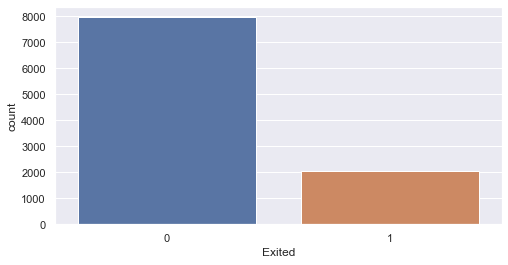

In [13]:
#Plot the target variable "Exited" to observe the distribution in this sample dataset
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x="Exited", data=df);

In [14]:
# Get the value counts for Exited dependent variable if the customer already Exited or not.
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Analyzing the target variable "Exited"

#### Above we have displayed the distribution of the target variable using a countplot and value_counts.
#### Based on this, we can conclude the dataset for target variable is highly imbalanced
#### 79.63% of the customers have not Exited the bank while 20.37% customers have Exited the bank in the sample dataset

# Perform Univariate & Bivariate Analysis

As part of this analysis we have provided
- Visualization of distribution of sample dataset for all continuous variables using a histogram, KDE distribution and boxplots (Univariate)
- Distribution of Categorical variables (Geography & Gender) within the sample dataset
- Bivariate analysis on 4 independent variables (Geography, Gender, HasCrCard, IsActiveMember) with the dependent variable (Exited) using countplots and crosstab function
- We have also provided the Pairplot and Heatmap for the continuous variable (after OneHotEncoding of categorical variables Georgraphy and Gender)

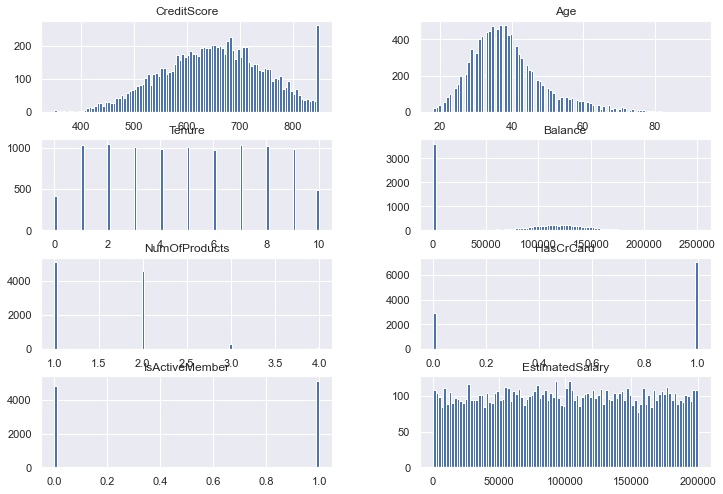

In [15]:
# Display distribution of data for each continuous variable and confirm the above observations on skewness (Univariate analysis)
columns = list(df)[0:-1]
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

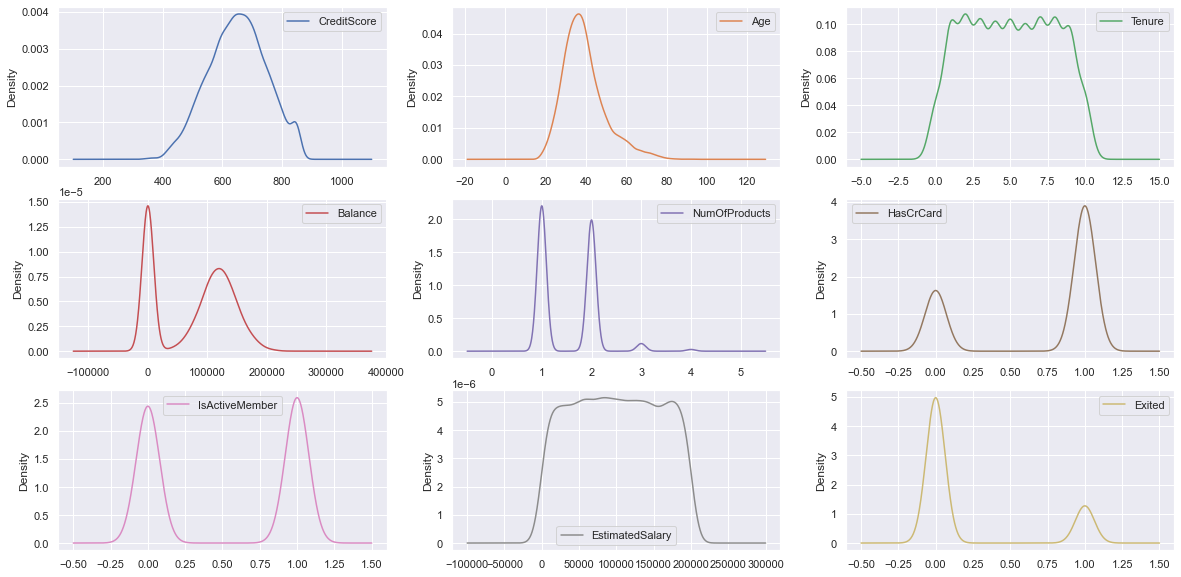

In [16]:
# Display Kernel Density Estimates (KDE) to review distribution of each continuous variable (Univariate analysis)
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20,10), sharex=False, sharey=False);

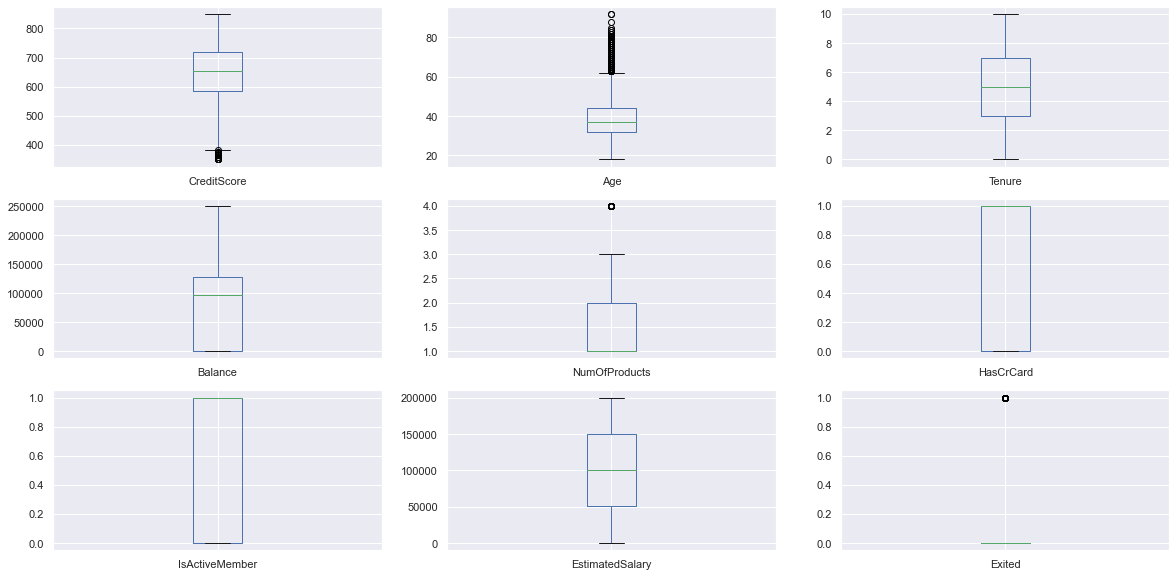

In [17]:
# Represent features in boxplot to observe central tendency, quartiles, whiskers and visually determine if there are outliers
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,10), sharex=False, sharey=False);

In [18]:
# We will observe the distribution of categorical independent variables (Geography and Gender)
for feature in ("Geography","Gender"):
    df[feature] = pd.Categorical(df[feature])
    print(df[feature].value_counts())
    print(' ')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
 
Male      5457
Female    4543
Name: Gender, dtype: int64
 


### Univariate Analysis

#### Analyzing the Histogram, KDE graph and Boxplots, we can confirm our initial observations about continuous variables. Data is not very skewed to require any treatment.
#### There are some outliers for Age and CreditScore.
#### Distribution for all continuous variable seem to be close to Normal Distribution with not much skewness

#### We have converted Geography and Gender variable from object to categorical so we can do OneHotEncoding prior to providing it to our model. 
#### For Geography, we can see 50% of the customers are from France, 25% each from Germany and Spain. We will do further analysis with relation to target variable Exited.
#### For Gender, we can observe Male are 55% and Female are 45% in the sample dataset.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

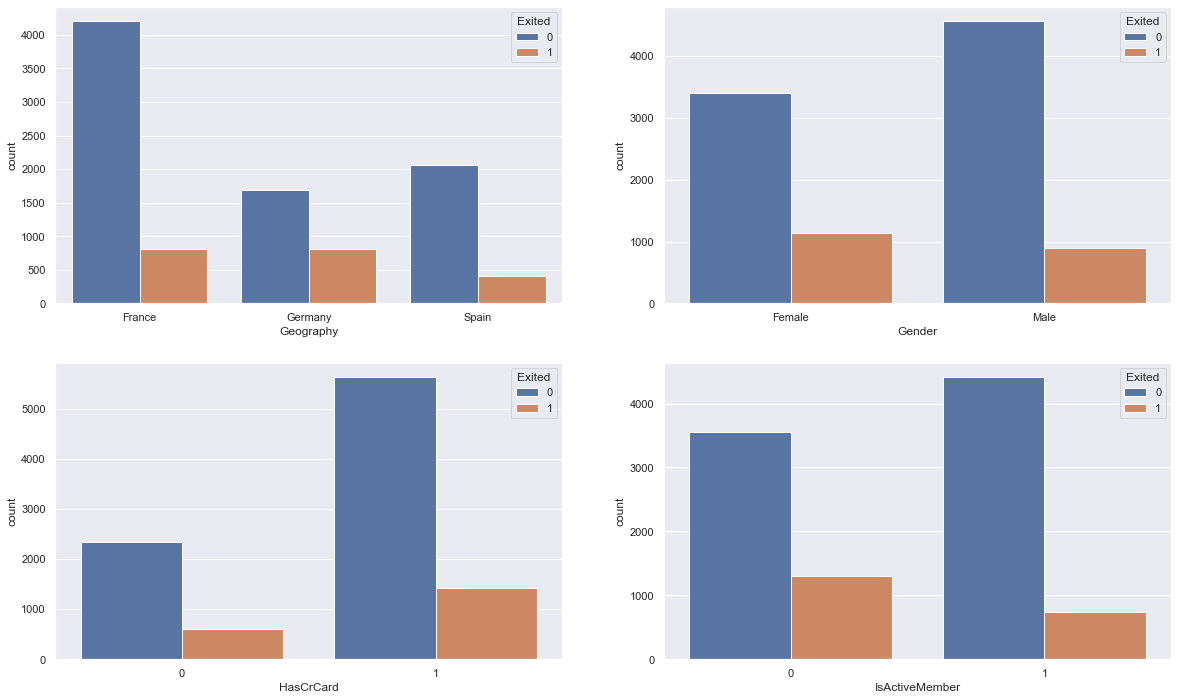

In [19]:
# Perform a bivariate analysis on 4 independent variables (Geography, Gender, HasCrCard, IsActiveMember)
# with the dependent variable (Exited) to provide insights.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [20]:
# The above graphical representation can be numerically represented in a tabular form using crosstab. This will help us provide 
# tangible insight into the influence of the below independent variables on the target/dependent variable "Exited"
pd.crosstab(df.Geography,df.Exited,normalize='index')

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [21]:
pd.crosstab(df.Gender,df.Exited,normalize='index')

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [22]:
pd.crosstab(df.HasCrCard,df.Exited,normalize='index')

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [23]:
pd.crosstab(df.IsActiveMember,df.Exited,normalize='index')

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

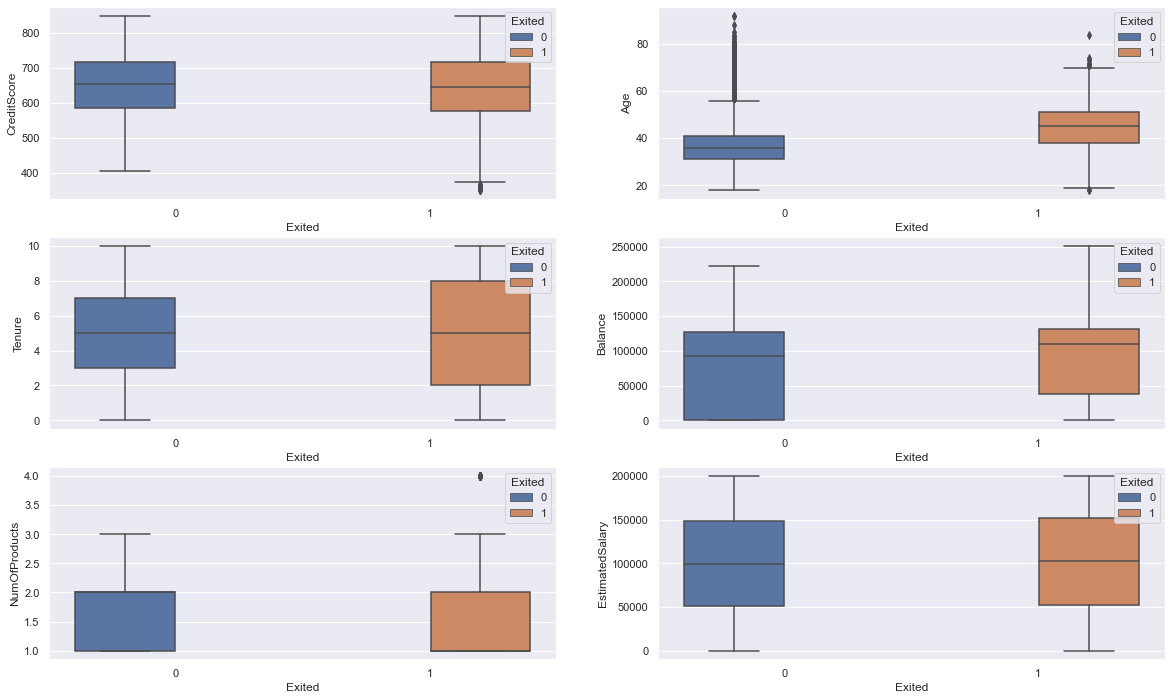

In [24]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

## OneHotEncoding for Geography and Gender variables
#### We will convert categorical data into a numerical form so our machine learning algorithm can take in that as input.

In [25]:
oneHotCols=["Geography","Gender"]

In [26]:
df=pd.get_dummies(df, columns=oneHotCols, drop_first=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [28]:
df.shape

(10000, 12)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00


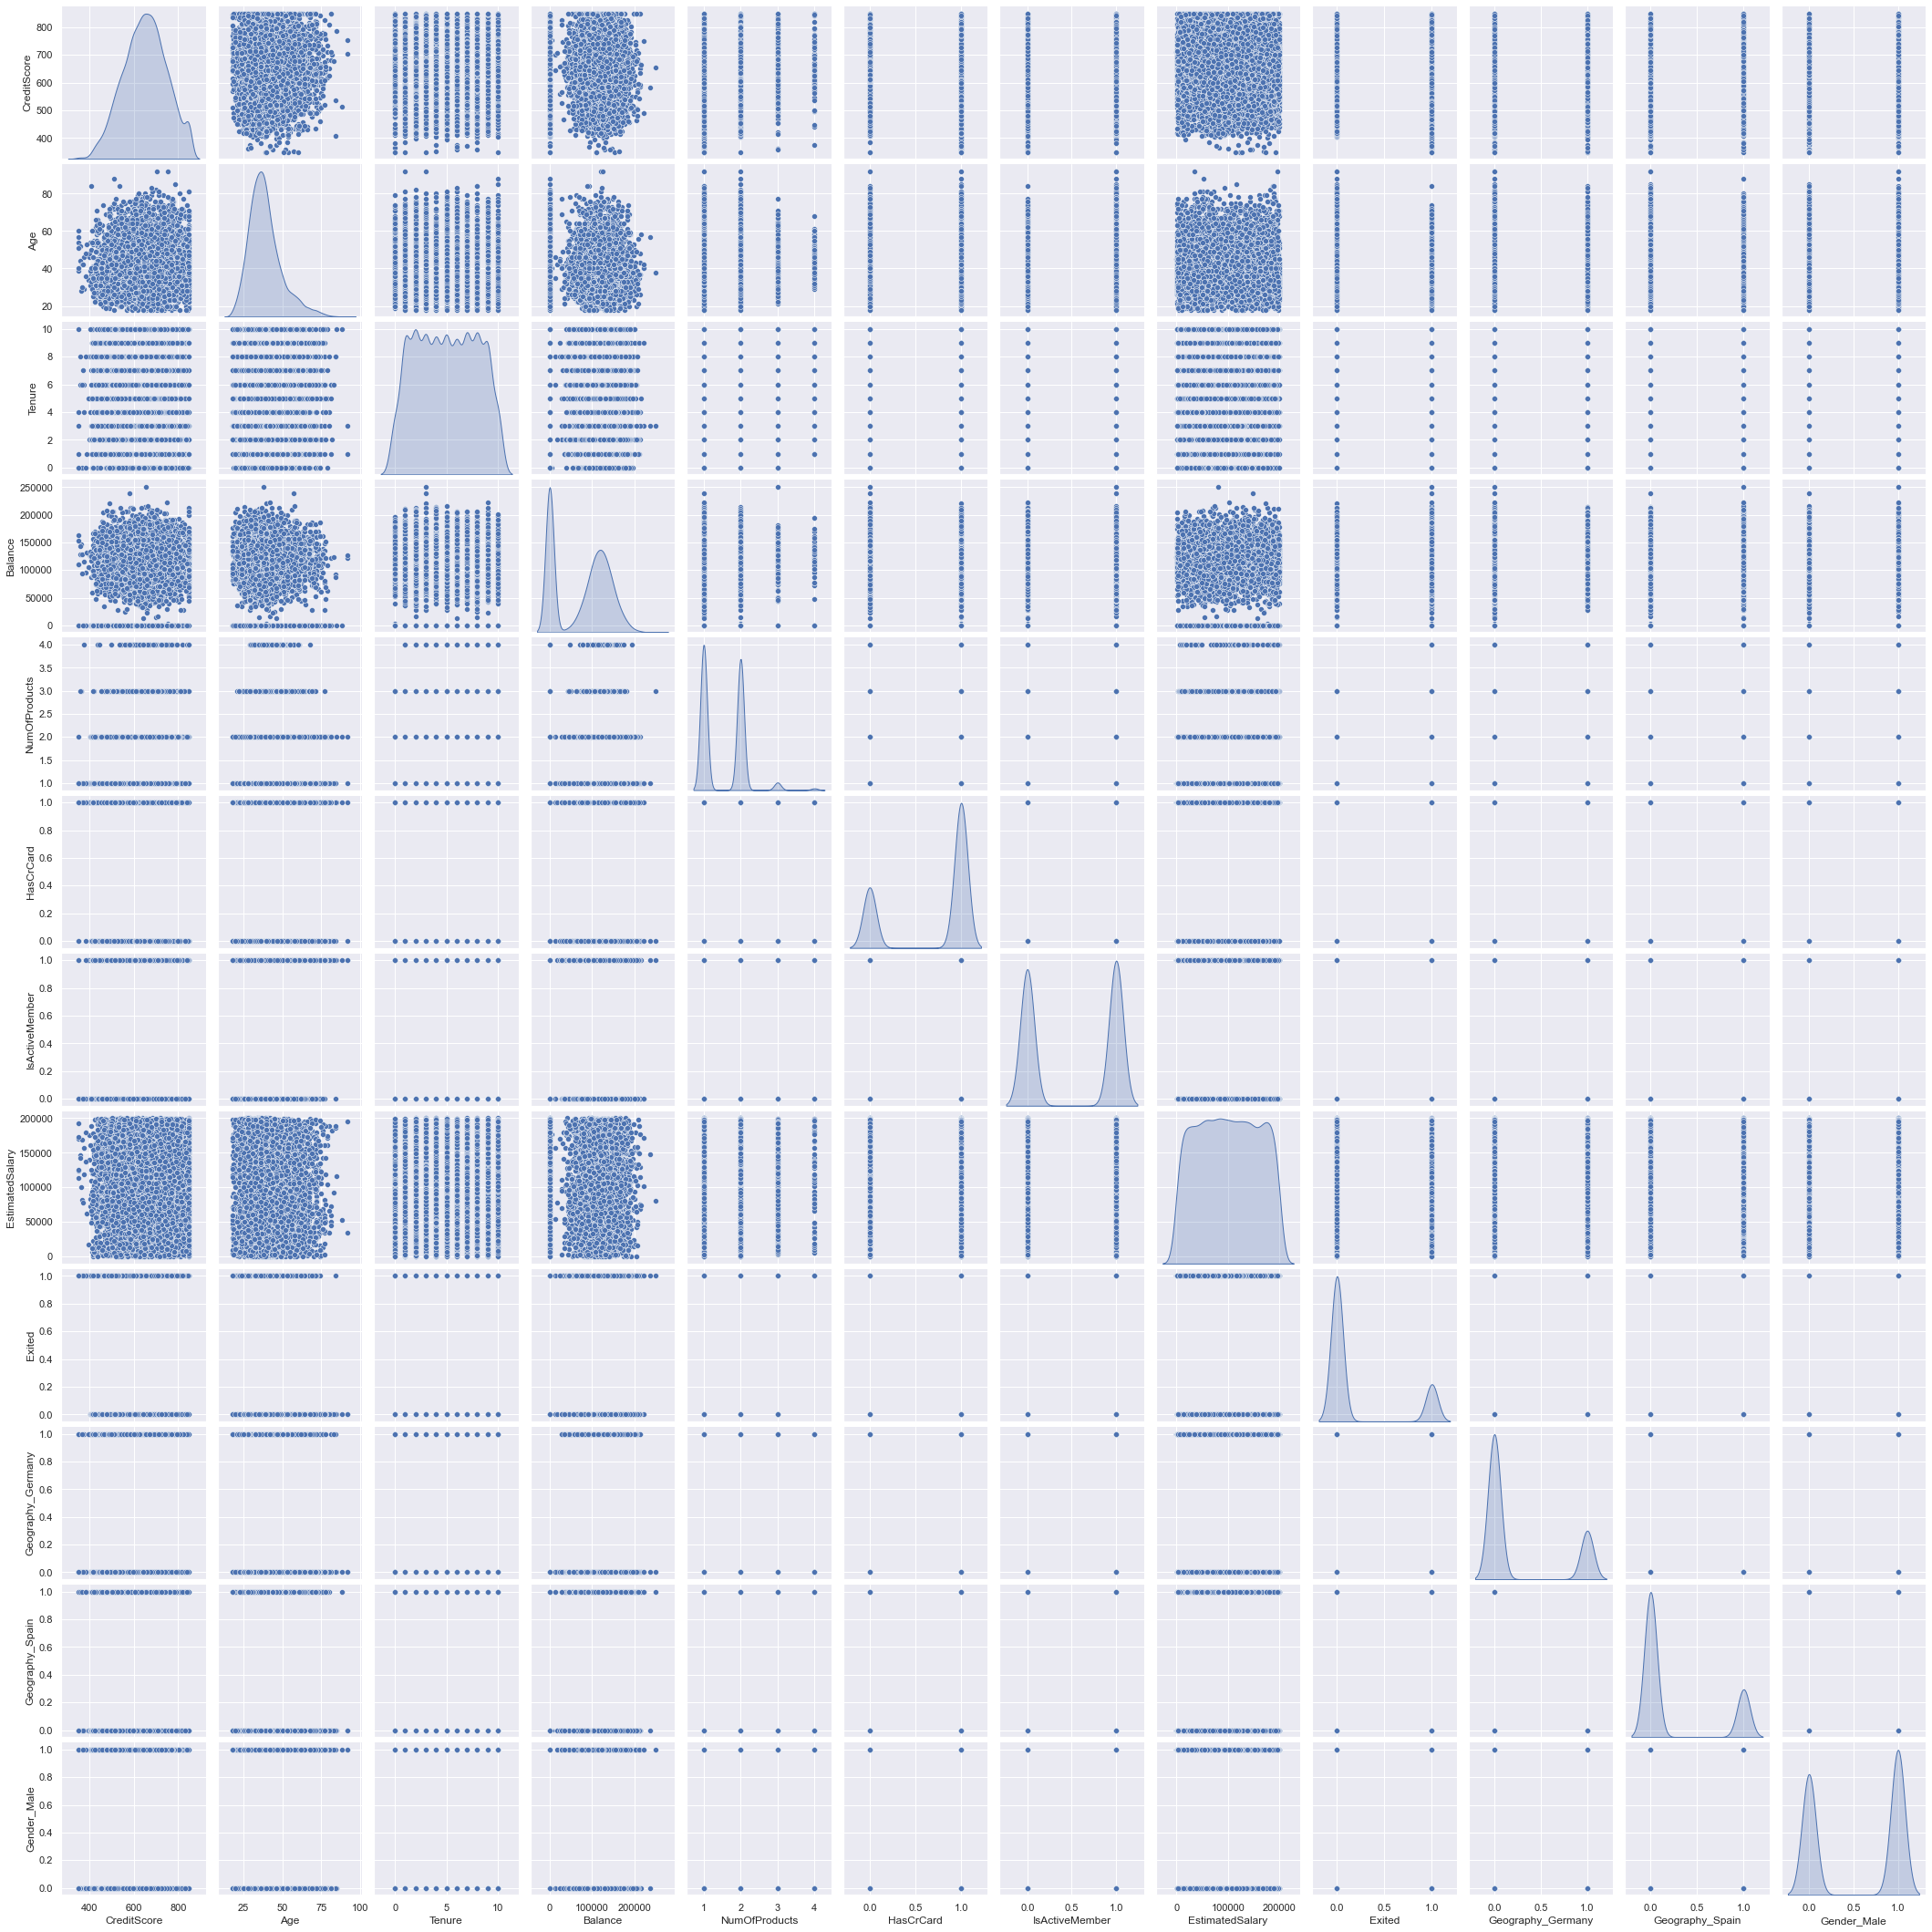

In [30]:
# Plot pairwise relationship of the variables in the dataset (Bivariate analysis). The diagonal plots are univariate distribution plots 
# to show the marginal distribution of the data in each column
sns.pairplot(df, diag_kind="kde");

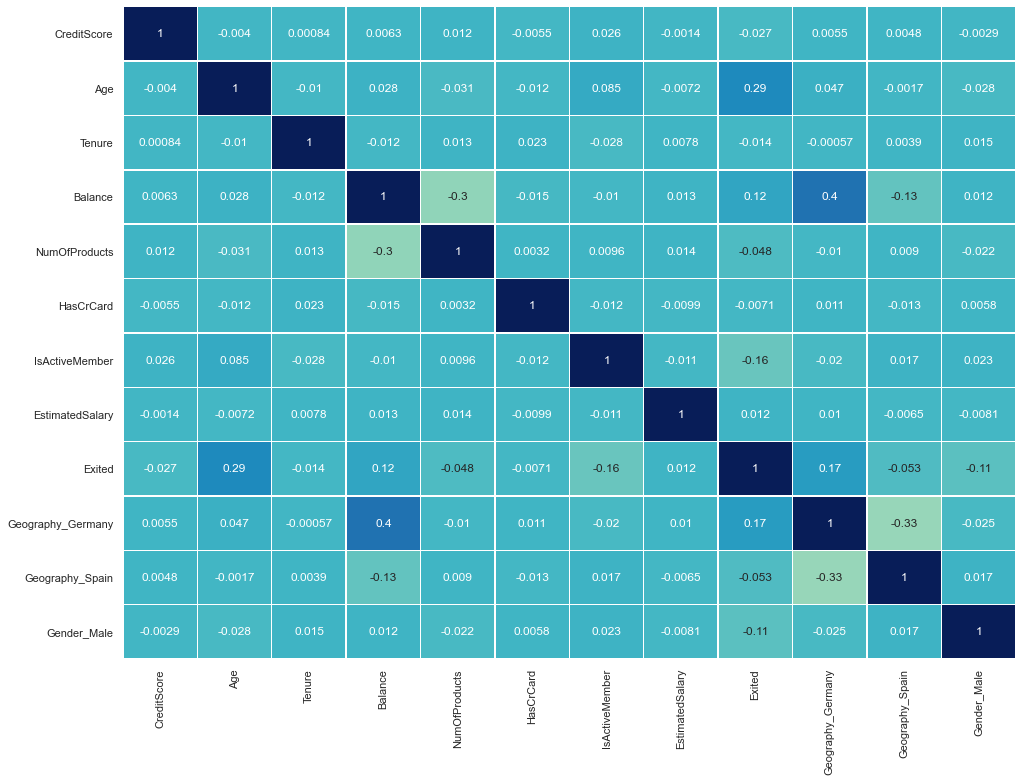

In [31]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

# Bivariate analysis

## Analysis of independent variables with the dependent variable (Exited)

### Geography 
#### France has 50% customers of the sample dataset but only 16% of French customers exited the bank
#### Germany had the highest percentage of Exited customer who left the bank. It has 25% customers of the total dataset but 32% of German customers exited the bank.
#### Spain has 25% customers in the sample dataset. Only 16% of Spanish customers exited the bank
#### German customers have higher attrition of customers leaving the bank compared to France and Spain.

### Gender
#### Males are 55% of the sample dataset and only 14% of Male customers left the bank
#### Females are 45% of the sample dataset but 25% of the Female customers left the bank
#### Females have higher attrition of customers leaving the bank compared to Males.

### CreditScore
#### There is no significant difference in the credit score distribution between retained and churned customers.

### Age
#### The older customers are churning more than the younger ones . The bank may need to review their target market or review the strategy for retention between the different age groups

### Tenure
#### With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

### Balance
#### Bank is losing customers with significant bank balances.

### NumOfProducts & Salary
#### Neither the product nor the salary has a significant effect on the likelihood to churn.


## Pairplot and Heatmap:

### Pairplot shows normal distribution for most of the continuous variables and there does not seem to be any significant skewness

### We don't see any strong or medium correlation of any independent variables with our target variable Exited. The highest correlation of Exited is with Age variable (0.29). All other independent variables have minimal correlation with Exited

In [32]:
## We will now distinguish/split the Independent variables (X) and dependent variable (y)

In [33]:
#Create and distinguish the feature (X) and target (y) data sets
X = df.drop('Exited', axis=1)
y = df['Exited']

### Below diagram provides an overview of how the Train, Test, Validation data is split from the sample dataset.
### The training data will also undergo Cross validation to ensure consistent in results of training data.

![Train, Test, Validate](TrainTestValidate.png)

# Divide the Data sets in Training and Test for both features and target data.

### The training-testing distribution is 70-30
### We will be using stratify for target dataset since this data set is highly imbalanced. By using stratify we ensure the distribution of the class is consistent across training and test data set

### We will convert the dependent dataframe to numpy array prior to providing it to Keras

### In order to train our model and later test its accuracy, we need to split the data into two datasets. In ANN feature scaling is very important so that all inputs are at a comparable range and only the weights assigned to them are, in fact, the only factor which makes a difference on the predicted value.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

y_train = np.array(y_train)
y_test = np.array(y_test)

### Below is the shape of Training and Test Dataset. We can see there are 11 independent features (X) that will be input to our machine learning algorithm

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


### Below diagram shows how StandardScaler will normalize the dataset

![Standard Scaler](StandardScaler.png)

In [36]:
# We will now normalize the dataset using StandardScaler. Alternatively, we can also use MinMaxScaler or preprocessing.normalize
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will now build and train an Artificial Neural Network

## Following will be the steps

**Step 1.** Randomly initialise the weights with small numbers close to zero but not zero. This will be done by our Dense function.

**Step 2.** Distribute features of the first observation, from our dataset, per each node in the input layer. 11 independent variables will be added to our input layer.

In [37]:
#Initialising the ANN - Defining as a sequence of layers
model = Sequential()

In [38]:
# Adding the input layer
#  NN_hidden1 - number of nodes to add to the hidden layer (6). There is no formula for this but the general guideline is 
# for it to be less than input dimension (it could also be half of  [input dimension + output dimension] )
#  kernel_initializer - randomly initialize the weight with small numbers close to zero, according to uniform distribution('uniform')
#  activation - Activation function ('relu').
#  input_dim - number of nodes in the input layer, that our hidden layer should be expecting (11 - X.shape[1])
initializer = 'uniform'
act='relu'
NN_hidden1=6

model.add(Dense(NN_hidden1, activation=act, kernel_initializer = initializer, input_dim = X.shape[1]))

**Step 3.** 
Foward-Propagation : From the input to the output the neurons are activated, and the impact they have in the predicted results is measured by the assigned weights. Depending on the number of hidden layers, the system propagates the activation until getting the predicted result y.

To define the additional hidden layer, we will have to define an activation function. There are many option but we will initially use Rectified Linear Units (relu) for the hidden layers. For the output layer, we will by using a Sigmoid function since this is a binary Classfication problem (leaving or staying the bank).

In [39]:
# Adding Second hidden layer
# There is no need to specify the input dimensions since our network already knows.
#  NN_hidden2 - number of nodes to add to the hidden layer (6)
#  kernel_initializer - randomly initialize the weight with small numbers close to zero, according to uniform distribution('uniform')
#  activation - Activation function ('relu').
NN_hidden2=6

model.add(Dense(NN_hidden2, activation=act, kernel_initializer = initializer))

In [40]:
# Adding Output layer
# There is no need to specify the input dimensions since our network already knows.
# We will one node in the output layer since this is a binary Classification problem
# activation — we will use 'sigmoid' since this is a binary Classification problem. If there are two or more categories in the 
# output we would use the softmax

model.add(Dense(1, activation = 'sigmoid'))

**Step 4.** Compile ANN Model by defining the Cost Function and Metrics

In [41]:
# Compiling the Neural Network Model with the below parameters
# optimizer — algorithm to use to find the best weights that will make our system powerful. We have several choices. We will initially use 'Adam' optimizer
# loss — Loss function within our optimizer algorithm. For binary Classification problem, 'binary_crossentropy' is used
# metric — criteria to evaluate the model. We will use accuracy metric to measure our model

# For optimizer, we will also provide a learning_rate that will determine the rate at which the gradient descent will learn
# and update the weights. We will use the default learning_rate for Adam optimizer which is 0.001
lnrate=0.001
opt="Adam"

optimizer = tf.keras.optimizers.Adam(lnrate)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

In [42]:
# We will observe the summary of the model before Training it
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


**Step 5.** 
Back-Propagation: from the output to the input layer, the calculated error is back-propagated and the weights get updated according to the influence they had on the error. The learning rates indicate how much these weights are updated.

**Step 6.** Batch Learning : Update the weights after each batch of observations (steps 1 to 5)

**Step 7.** When the system has gone through the whole training dataset, an epoch has been run. Redo more epochs.

In [43]:
# Fitting the Neural Network model to the Training Set
# batch_size : number of observations after which we update the weights. We will initially set it to 10
# epochs: How many times you train your model. We will initially set this to 100

# We will now Train the model

ep=100
bsz=10
#class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
#class_weight_dict = dict(enumerate(class_weights))

#model.fit(X_train, y_train, batch_size = bsz, epochs = ep, class_weight=class_weight_dict, verbose = False)
model.fit(X_train, y_train, batch_size = bsz, epochs = ep, verbose = False)

# Predicting the results using 0.5 as a threshold 

### We’ve trained our Neural Network model and now we’re ready to see its capability on predicting future churn results with our test set.

In [44]:
# We will predict the result for the test target class using 0.5 as a threshold
y_pred = (model.predict(X_test) > 0.5).astype("int32")
loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [45]:
# We will print the Accuracy score and the Loss for the Test data
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.834
Loss: 0.420


In [46]:
# We will print the Confusion Matrix for the True and Predicted Class
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2307   82]
 [ 415  196]]


In [47]:
# Below is the Classification report for various other scores (accuracy, precision, recall, F1 and Support) for target class
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2389
           1       0.71      0.32      0.44       611

    accuracy                           0.83      3000
   macro avg       0.78      0.64      0.67      3000
weighted avg       0.82      0.83      0.81      3000



#### For our initial model execution, we have achieved 83% accuracy score. 

#### For the test data set of 3000 customers, our model was able to predict correctly for 2503 customers. This information is reflected in the Confusion Matrix printed above. 

## From the above results, our goal is to predict the customers that will possibly churn hence the recall measure for Class 1 is of more importance than the overall accuracy score of the model.


#### Out of 611 customers in Class 1 (test data set), our initial model got a recall score of 0.32 and a precision score of 0.71. Although our accuracy score is 0.83, for this imbalanced data, accuracy is not as effective a measure compare to recall and precision. We will try to improve the most important measure (recall in this case) while trying to keep precision score high as well. Accuracy score will be less important compared to recall and precision. Recall score is a measure of True Positives in all True Actuals. Precision is a measure of True Positives in all True Predictions. Our goal is to reduce Type 2 errors (thereby reduce False Negatives for Class 1 and improve the recall score) followed by reduction of Type 1 errors (thereby reduce False Positives for Class 1 and improve the precision score).   

## We will now use K-Fold Cross Validation to ensure reduce bias and variance and measure of confidence level in the accuracy score

# K-Fold Cross Validation to reduce Bias and Variance

#### K-Fold CV gives a model with less bias compared to other methods. In K-Fold CV, we have a parameter ‘k’. This parameter decides how many folds the dataset is going to be divided. Every fold gets chance to appears in the training set (k-1) times, which in turn ensures that every observation in the dataset appears in the dataset, thus enabling the model to learn the underlying data distribution better. The value of ‘k’ used is generally between 5 or 10. The value of ‘k’ should not be too low or too high. If the value of ‘k’ is too low (say k = 2), we will have a highly biased model


![KFoldCV](KFoldCV.jpg)

In [48]:
# For KFold Cross Validation implementation,  we will combine scikit-learn with keras.
# Keras has an excellent module that allows the wrapping of these this in KerasClassifier.
# We have already imported the necessary modules (KerasClassfier and cross_val_score) at the start of this module.
# We will build a function for KerasClassfier with all the same values we used in the above example and Cross Validation with 10 Folds

def build_model():
    model = Sequential()
    model.add(Dense(6, activation='relu', kernel_initializer = 'uniform', input_dim = X.shape[1]))
    model.add(Dense(6, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

#fit our model to the training data using KerasClassifier
model = KerasClassifier(build_fn = build_model, batch_size = 10, epochs = 100 )
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [49]:
# Below are the values of mean accuracy score, variance and the 95% Confidence level range for the accuracy score of training
# data with K-cross validation (10 folds)
mean = accuracies.mean()
variance = accuracies.std()
lowval = mean -(1.96)*variance
highval = mean +(1.96)*variance
print ("Mean: {:0.3f}".format(mean))
print ("Variance/Standard Deviation: {:0.3f}".format(variance))
print ("95pct Confidence level : {:0.3f} - {:0.3f}".format(lowval,highval))

Mean: 0.848
Variance/Standard Deviation: 0.013
95pct Confidence level : 0.822 - 0.873


# With K Cross Validation, we can be more confident about the accuracy score of this model
#### We can say with 95% Confidence level that the range of accuracy score for the above hyperparameters lies in the range of 0.82 to 0.87

#### We also got a mean accuracy score of 0.85 which is close to our initial model execution.


#### We will now try and improve our ANN model by tuning the hyperparameters

## Since this data is highly imbalanced towards Bank Customers who will stay with the bank (79.63% in Class 0, 20.37% in Class 1), we will be using class_weight parameter. This parameter will ensure we give 4 times more weightage to Class 1 compared to Class 0 (we will be computing this value using compute_class_weight method).

## Try to Improve the scores of the initial model using class_weight parameter

In [51]:
model = Sequential()
model.add(Dense(6, activation='relu', kernel_initializer = 'uniform', input_dim = X.shape[1]))
model.add(Dense(6, activation='relu', kernel_initializer = 'uniform'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

In [52]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
class_weight_dict = dict(enumerate(class_weights))

model.fit(X_train, y_train, batch_size = 10, epochs = 100, class_weight=class_weight_dict, verbose = False)

In [53]:
# We will predict the result for the test target class using 0.5 as a threshold
y_pred = (model.predict(X_test) > 0.5).astype("int32")
loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [54]:
# We will print the Accuracy score and the Loss for the Test data
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.799
Loss: 0.443


In [55]:
# We will print the Confusion Matrix for the True and Predicted Class
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1959  430]
 [ 172  439]]


In [56]:
# Below is the Classification report for various other scores (accuracy, precision, recall, F1 and Support) for target class
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2389
           1       0.51      0.72      0.59       611

    accuracy                           0.80      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.83      0.80      0.81      3000



### Below are the scores for the improved model over the initial model execution. 

#### For the test data set of 3000 customers, our model was able to predict correctly for 2398 customers. This information is reflected in the Confusion Matrix printed above. 

#### From the above results, our goal is to predict the customers that will possibly churn hence the recall measures on the 1's is of more importance than the overall accuracy score of the model.


#### Out of 611 customers in Class 1 (test data set), our improved model got a recall score of 0.72 (compared to 0.32) and a precision score of 0.51 (compared to 0.71).  Accuracy score is 0.80 which has not reduced much compared to 0.83 from the initial model   

# Summary of comparison of Initial Model and Improved model (using class_weight)

**Initial Model Scores**
- Recall : 0.32 (for Class 1)
- Precision : 0.71 (for Class 1)
- Accuracy : 0.83

**Improved Model using class_weights**
- Recall : 0.72 (for Class 1)
- Precision : 0.51 (for Class 1)
- Accuracy : 0.80

### We have got a much higher recall score from our improved model using class_weights. Precision score went down a bit while the accuracy score was still at 0.80

### Next we will tune the hyperparameters using RandomizedSearchCV to identify the best combination of parameters for our model and dataset.

# Improvements to the Artificial Neural Network model by tuning hyperparameters

#### We have parameters that are learned by the model (weights) and the parameters that are fixed, the hyperparameters. These can be the 

- **Tune number of epochs and batch_size**
![EpochsBatchsize](EpochsBatchsize.png)
- **Choose the best optimizer** (RMSprop, Adam, SGD, Adagrad, Adadelta, Nadam)
- **Find the most appropriate Learning Rate for the optimizer** (The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated)
- **Identify the best initializers for weights** (uniform, lecun_uniform, normal, zero, glorot_normal, glorot_uniform.....)
- **Best activation functions for the hidden layers** (relu, tanh, sigmoid, linear....)
![ActivationFunction](activationfn.png)
- **Dropout rate for Regularization to avoid Overfitting**
![dropout](dropout.jpg)
- **Number of Neurons in the hidden layers**
- **Identify the number of hidden layers for this model**

# We will pick some of these hyperparameters for tuning using RandomizedSearchCV to identify the best combination giving us the highest accuracy score

![RSCV](RandomizedSearchCV.jpg)

## Since this data is highly imbalanced towards Bank Customers who will stay with the bank (79.63% in Class 0, 20.37% in Class 1), we will be using class_weight parameter. This parameter will ensure we give 4 times more weightage to Class 1 compared to Class 0 (we will be computing this value using compute_class_weight method). This will be implemented in RandomizedSearchCV while fitting the model

## Our focus is to improve the recall score (followed by precision and accuracy score) for our improved model.

### We will be using KerasClassifier that take an argument build_fn which is the name of the function to call to get your model. This function defines your model, compiles it and returns it. This model is then passed to RandomizedSearchCV to tune your hyperparameters and get the best combination for your model for a given dataset.

In [59]:
# We will build a function for KerasClassfier and pass different values for the following hyperparameters
# optimizer, epochs, batch_size, initializer, learning_rate, activation function, dropoutrate, #Neurons for Hidden Layers 1 and 2
def build_modelRSCV(optimizer="SGD", epochs=10, batch_size=10, initializer='uniform',learn_rate='0.001', activation='relu', NN_hidden1=1, NN_hidden2=1):
    if optimizer == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
    elif optimizer == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learn_rate)
    elif optimizer == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learn_rate)
    elif optimizer == 'Adadelta':
        optimizer = tf.keras.optimizers.Adadelta(learning_rate=learn_rate)
    elif optimizer == 'Adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=learn_rate)
    elif optimizer == 'Nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learn_rate)
    else:
        optimizer = tf.keras.optimizers.Ftrl(learning_rate=learn_rate)
    model = Sequential()
    model.add(Dense(NN_hidden1, activation=activation, kernel_initializer = initializer, input_dim = X.shape[1]))
#    model.add(Dropout(dropout_rate))
    model.add(Dense(NN_hidden2, activation=activation, kernel_initializer = initializer))
#    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

In [60]:
##fit our model to the training data using KerasClassifier
model = KerasClassifier(build_fn = build_modelRSCV, verbose=1)

In [61]:
epochs = sp_randInt(100,500)
batch_size = sp_randInt(10,50)
#optimizer = ["RMSprop", "Adam","SGD", "Adagrad", "Adadelta", "Nadam"]
optimizer = ["RMSprop", "Adam","SGD"]
#learn_rate = [0.001, 0.01, 0.1, 0.05, 0.005, 0.2]
learn_rate = [0.001, 0.01, 0.1, 0.05]
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
init_mode = ['uniform']
#activation = ['softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation = ['relu']
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#NN_hidden1 = [256, 128, 64, 32, 16, 8, 4]
#NN_hidden2 = [32, 16, 8, 4]
NN_hidden1 = [6, 8, 10]
NN_hidden2 = [6, 8, 10]
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
class_weight_dict = dict(enumerate(class_weights))
#class_weight = {0:1,1:4}

#hyperparameters = dict(optimizer=optimizer, epochs=epochs, batch_size=batch_size, learn_rate=learn_rate, initializer=init_mode, activation=activation, dropout_rate=dropout_rate, NN_hidden1=NN_hidden1, NN_hidden2=NN_hidden2)
hyperparameters = dict(optimizer=optimizer, epochs=epochs, batch_size=batch_size, learn_rate=learn_rate, initializer=init_mode, activation=activation, NN_hidden1=NN_hidden1, NN_hidden2=NN_hidden2)
RSCV = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=10, n_jobs=-1, random_state=7)

RSCV_result = RSCV.fit(X_train, y_train, class_weight=class_weight_dict)
print(RSCV_result.best_params_)

y_pred = (RSCV_result.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
cr=classification_report(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)


Epoch 1/251
412/412 [==============================] - 1s 589us/step - loss: 0.6624 - accuracy: 0.7090
Epoch 2/251
412/412 [==============================] - 0s 584us/step - loss: 0.5687 - accuracy: 0.7061
Epoch 3/251
412/412 [==============================] - 0s 611us/step - loss: 0.5449 - accuracy: 0.7335
Epoch 4/251
412/412 [==============================] - 0s 596us/step - loss: 0.5242 - accuracy: 0.7386
Epoch 5/251
412/412 [==============================] - 0s 720us/step - loss: 0.4967 - accuracy: 0.7465
Epoch 6/251
412/412 [==============================] - 0s 702us/step - loss: 0.4958 - accuracy: 0.7578
Epoch 7/251
412/412 [==============================] - 0s 628us/step - loss: 0.4866 - accuracy: 0.7611
Epoch 8/251
412/412 [==============================] - 0s 589us/step - loss: 0.4758 - accuracy: 0.7729
Epoch 9/251
412/412 [==============================] - 0s 625us/step - loss: 0.4656 - accuracy: 0.7727
Epoch 10/251
412/412 [==============================] - 0s 616us/step - l

412/412 [==============================] - 0s 594us/step - loss: 0.4509 - accuracy: 0.7931
Epoch 80/251
412/412 [==============================] - 0s 606us/step - loss: 0.4336 - accuracy: 0.8103
Epoch 81/251
412/412 [==============================] - 0s 582us/step - loss: 0.4523 - accuracy: 0.7932
Epoch 82/251
412/412 [==============================] - 0s 596us/step - loss: 0.4541 - accuracy: 0.7945
Epoch 83/251
412/412 [==============================] - 0s 584us/step - loss: 0.4527 - accuracy: 0.7958
Epoch 84/251
412/412 [==============================] - 0s 611us/step - loss: 0.4488 - accuracy: 0.7916
Epoch 85/251
412/412 [==============================] - 0s 582us/step - loss: 0.4410 - accuracy: 0.8098
Epoch 86/251
412/412 [==============================] - 0s 645us/step - loss: 0.4477 - accuracy: 0.7979
Epoch 87/251
412/412 [==============================] - 0s 587us/step - loss: 0.4399 - accuracy: 0.8058
Epoch 88/251
412/412 [==============================] - 0s 596us/step - loss:

412/412 [==============================] - 0s 618us/step - loss: 0.4476 - accuracy: 0.8058
Epoch 158/251
412/412 [==============================] - 0s 574us/step - loss: 0.4354 - accuracy: 0.8143
Epoch 159/251
412/412 [==============================] - 0s 628us/step - loss: 0.4503 - accuracy: 0.8008
Epoch 160/251
412/412 [==============================] - 0s 582us/step - loss: 0.4469 - accuracy: 0.8119
Epoch 161/251
412/412 [==============================] - 0s 642us/step - loss: 0.4472 - accuracy: 0.8114
Epoch 162/251
412/412 [==============================] - 0s 660us/step - loss: 0.4456 - accuracy: 0.8012
Epoch 163/251
412/412 [==============================] - 0s 621us/step - loss: 0.4500 - accuracy: 0.8024
Epoch 164/251
412/412 [==============================] - 0s 577us/step - loss: 0.4593 - accuracy: 0.8041
Epoch 165/251
412/412 [==============================] - 0s 604us/step - loss: 0.4712 - accuracy: 0.7936
Epoch 166/251
412/412 [==============================] - 0s 587us/ste

412/412 [==============================] - 0s 618us/step - loss: 0.4471 - accuracy: 0.8127
Epoch 236/251
412/412 [==============================] - 0s 574us/step - loss: 0.4434 - accuracy: 0.8041
Epoch 237/251
412/412 [==============================] - 0s 611us/step - loss: 0.4489 - accuracy: 0.8014
Epoch 238/251
412/412 [==============================] - 0s 574us/step - loss: 0.4581 - accuracy: 0.7959
Epoch 239/251
412/412 [==============================] - 0s 601us/step - loss: 0.4516 - accuracy: 0.8001
Epoch 240/251
412/412 [==============================] - 0s 585us/step - loss: 0.4536 - accuracy: 0.7978
Epoch 241/251
412/412 [==============================] - 0s 606us/step - loss: 0.4561 - accuracy: 0.8024
Epoch 242/251
412/412 [==============================] - 0s 584us/step - loss: 0.4472 - accuracy: 0.8050
Epoch 243/251
412/412 [==============================] - 0s 601us/step - loss: 0.4579 - accuracy: 0.8042
Epoch 244/251
412/412 [==============================] - 0s 584us/ste

In [62]:
print("The best parameters identified by RandomizedSearchCV are :")
for key, value in RSCV_result.best_params_.items():
    print(key, ' : ', value)
print(' ')
print ("Confusion Matrix for our Model:")
print(cm)
print(' ')
print("Accuracy Score: {}".format(acc))

The best parameters identified by RandomizedSearchCV are :
NN_hidden1  :  6
NN_hidden2  :  8
activation  :  relu
batch_size  :  17
epochs  :  251
initializer  :  uniform
learn_rate  :  0.001
optimizer  :  RMSprop
 
Confusion Matrix for our Model:
[[1939  450]
 [ 165  446]]
 
Accuracy Score: 0.795


In [63]:
# Below is the Classification report for various other scores (accuracy, precision, recall, F1 and Support) for target class
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2389
           1       0.50      0.73      0.59       611

    accuracy                           0.80      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.84      0.80      0.81      3000



### Using RandomizedSearchCV, we have found the best hyperparameter combination for this Bank Customer dataset. Following are the hyperparameters identified
- Number of Neurons in Hidden Layer 1 : 6
- Number of Neurons in Hidden Layer 2 : 8
- Activation Function : relu
- Kernel Initializer : uniform
- Optimizer : RMSprop
- Learning Rate : 0.001
- Dropout Regularization rate : 0.3 (in each layer)
- Number of epochs : 251
- Batch Size : 17

### Below are the scores for the model with Hyperparameter Tuning (RandomizedSearchCV)

#### For the test data set of 3000 customers, our model was able to predict correctly for 2385 customers. This information is reflected in the Confusion Matrix printed above. 

#### We got a recall score of 0.73 which is the highest compared to our previous model scores.




# Summary of comparison of Initial Model, Improved model (using class_weight) and Model with Hyperparameter tuning (RandomizedSearchCV)

**Initial Model Scores**
- Recall : 0.32 (for Class 1)
- Precision : 0.71 (for Class 1)
- Accuracy : 0.83

**Improved Model using class_weights**
- Recall : 0.72 (for Class 1)
- Precision : 0.51 (for Class 1)
- Accuracy : 0.80

**Improved Model with Hyperparameter Tuning (RandomizedSearchCV)**
- Recall : 0.73 (for Class 1)
- Precision : 0.50 (for Class 1)
- Accuracy : 0.80

## Our Model with Hyperparameter tuning gives us the best score of Recall (0.73). This is the most important score for our Bank Customer Churn Prediction since the cost of False Negative is much higher (Model predicts the customer will stay with the bank but actually leaves). Precision score is also important but not as important as Recall. Precision score indicates that the model predicted the customer may leave the bank but actually they stay. This may incur additional costs for the bank and its sales/marketing team but they will not lose the customer.

# Summary
## We successfully have implemented the Neural Network Model for predicting Bank Customer Churn for the sample dataset provided.

## Through various different model implementations, we were able to progressively improve the Scores. Recall is the most important score. We were able to improve it from 0.32 to 0.73 in our final model recommendation after Hyperparameter tuning. We were able to keep the Precision score and Accuracy score high enough to a satisfactory level.

## We can further tune this model for higher scores by doing additional tuning like using dropout Regularization and increasing the number of hidden layers.



In [64]:
!jupyter nbconvert --to html PredictChurnforBankCustomersv3-JugalMajethia

[NbConvertApp] Converting notebook PredictChurnforBankCustomersv3-JugalMajethia.ipynb to html
[NbConvertApp] Writing 2361862 bytes to PredictChurnforBankCustomersv3-JugalMajethia.html
